# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
output_data = "output_data/cities.csv"
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:

url = "https://api.openweathermap.org/data/2.5/weather?q="
unit = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = []

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = []
        city_lng =[]
        city_max_temp = []
        city_humidity = []
        city_clouds = []
        city_wind = []
        city_country = []
        city_date = []
        found_cities=[]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | amderma
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | najran
Processing Record 12 of Set 1 | murmansk
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | aguimes
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | jiujiang
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | nabire
Processing Record 21 of Set 1 | mentok
Processing Record 22 of Set 1 | trelew
Processing Record 23 of Set 1 | coquimbo
Pro

In [13]:
Weather_DF = pd.DataFrame({"City": found_cities,
                           "Country": city_country,
                           "Temperature": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Windspeed": city_wind,
                           "Latitude": city_lat,
                           "Longitude": city_lng,
                           "Date": city_date
                          })
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_dataframe = Weather_DF[(Weather_DF['Humidity'] >100)]
clean_city_dataframe

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [15]:
# Extract relevant fields from the data frame
Weather_DF = pd.read_csv("../weather/output_data/weather_data.csv")
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
# Windows path
# City_Data.to_csv('City_Data.csv', index = False)
# windows path
City_Data.to_csv(r'../weather/output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,severo-kurilsk,RU,50.6789,46.63,77,59,14.63,1635209454
1,atuona,PF,-9.8000,78.10,72,25,17.11,1635209734
2,quatre cocos,MU,-20.2078,73.51,78,36,14.81,1635209755
3,cayenne,GF,4.9333,78.10,89,75,3.00,1635209765
4,maneadero,MX,31.7167,64.09,79,100,1.99,1635209775


In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= City_Data 

# Show Record Count
city_data_df.count()

City           568
Country        565
Latitude       568
Temperature    568
Humidity       568
Cloudiness     568
Windspeed      568
Date           568
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,severo-kurilsk,RU,50.6789,46.63,77,59,14.63,1635209454
1,atuona,PF,-9.8000,78.10,72,25,17.11,1635209734
2,quatre cocos,MU,-20.2078,73.51,78,36,14.81,1635209755
3,cayenne,GF,4.9333,78.10,89,75,3.00,1635209765
4,maneadero,MX,31.7167,64.09,79,100,1.99,1635209775


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
City_ID,,,,,,,,
0,severo-kurilsk,RU,50.6789,46.63,77,59,14.63,1635209454
1,atuona,PF,-9.8000,78.10,72,25,17.11,1635209734
2,quatre cocos,MU,-20.2078,73.51,78,36,14.81,1635209755
3,cayenne,GF,4.9333,78.10,89,75,3.00,1635209765
4,maneadero,MX,31.7167,64.09,79,100,1.99,1635209775


### Create the Scatter Plots Requested

#### 1 Latitude Vs. Temperature

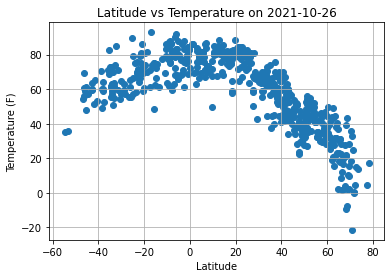

In [20]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../weather/output_data/1.Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

#### 2  Latitude Vs. Humidity

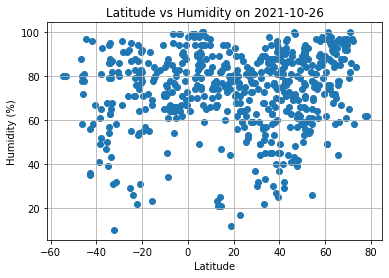

In [21]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../weather/output_data/2.Latitude vs Humidity on {runDate}.png')
plt.show()

#### 3 Latitude Vs. Cloudiness

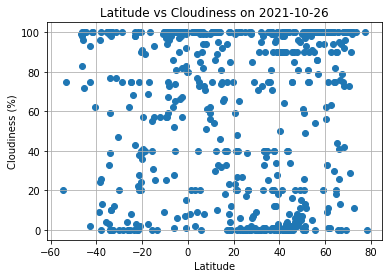

In [22]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../weather/output_data/3.Latitude vs Cloudiness on {runDate}.png')
plt.show()

#### 4 Latitude vs. Wind Speed Plot

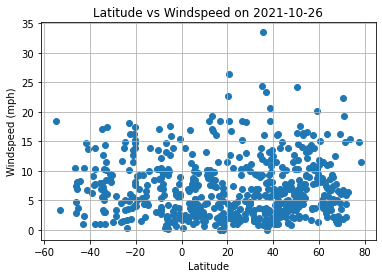

In [23]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../weather/output_data/4.Latitude vs Windspeed on {runDate}.png')
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
 # Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

### Temperature vs. Latitude Linear Regression Plot

##### Southern Hem

The r-square is 0.6730712334929924
y = 0.54x + 81.47


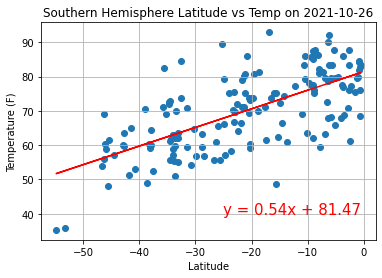

In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../weather/output_data/Southern1. Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

##### Northern Hem

The r-square is -0.8839467167735444
y = -0.96x + 91.06


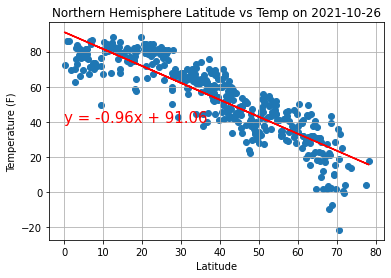

In [27]:
# Northern Hemisphere
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../weather/output_data/Northern1. Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

###  Humidity vs. Latitude Linear Regression Plot

##### Southern Hem

The r-squared is: 0.022602502728401405


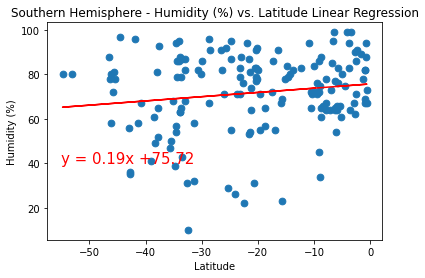

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_DF['Latitude'], Southern_DF['Humidity'])
regress_values = (Southern_DF['Latitude'] * slope + intercept)
plt.plot(Southern_DF['Latitude'], regress_values, 'r-')
plt.scatter(Southern_DF['Latitude'], Southern_DF['Humidity'], marker='o', s=45)
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.savefig(f'../weather/output_data/Southern2. Hemisphere Humidity(%) vs Latitude.png on {runDate}.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#### Northern Hem

The r-squared is: 0.004898048154662483


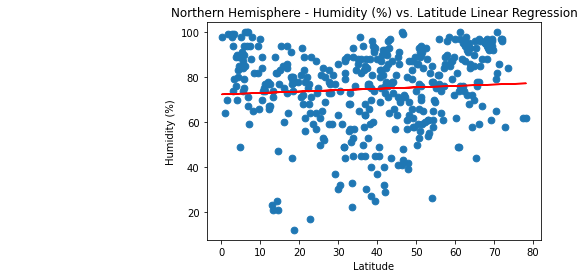

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_DF['Latitude'], Northern_DF['Humidity'])
regress_values = (Northern_DF['Latitude'] * slope + intercept)
plt.plot(Northern_DF['Latitude'], regress_values, 'r-')
plt.scatter(Northern_DF['Latitude'], Northern_DF['Humidity'], marker='o', s=45)
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.savefig(f'../weather/output_data/Northern2. Hemisphere Humidity(%) vs Latitude.png on {runDate}.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The r value for the Northern hemisphere (-0.8) shows us that there is a slight pattern between the latitude and the humidity with it veering towards a higher humidity increasing with the latitude. However, I would not consider this a strong pattern. The r value for the Southern hemisphere (0 .67) shows a stronger pattern than the Northern hemisphere with the humidity increasing as the latitude reaches zero, but still not a strong correlation.

### Cloudiness vs. Latitude Linear Regression Plot

#### Northern Hem

The r-square is 0.06427869961215028
y = 0.13x + 53.29


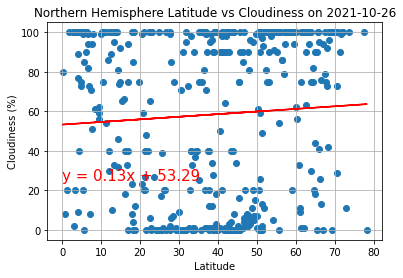

In [36]:
# Northern Hemisphere
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../weather/output_data/Northern3. Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

#### Southern Hem

The r-square is 0.1583368280960344
y = 0.43x + 69.66


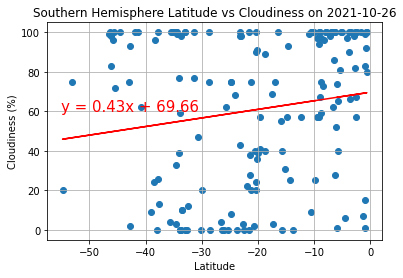

In [35]:
# Southern Hemisphere

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../weather/output_data/Southern3. Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** The r value for the northern hemisphere (0.06) shows little pattern in the wind sppeed and the Southern one is not much better at (0.15) I do not think there is a correlation between the Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

#### Northern Hem

The r-square is 0.09574481285044133
y = 0.02x + 6.1


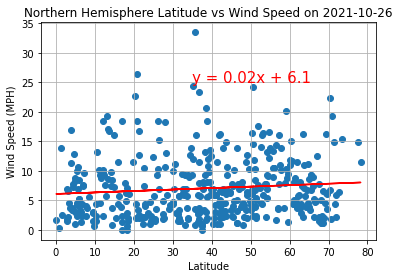

In [37]:
# Northern Hem
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../weather/output_data/Northern4. Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

#### Southern Hem

The r-square is -0.0947932259791076
y = -0.03x + 6.69


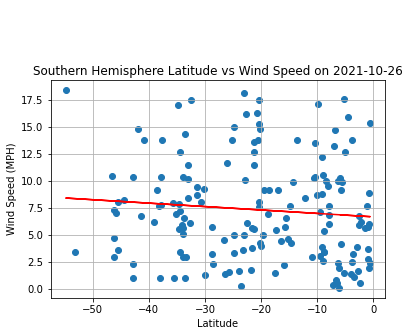

In [38]:
# Southern Hemisphere
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
RegEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../weather/output_data/Southern4. Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

**Discussion about the linear relationship:**  The r value for the northern hemisphere (0.09) shows little pattern in the wind speed and the Southern one is  (-0.09). In the Northern Hemisphere there is a weak positive linear relationship between latitude and wind speed. As the latitude increases away from the equator the wind spead increases slightly. In the southern hemisphere there is a weak negative linear relationship between latitude and wind speed. As the latitude increases towards the equator, the wind speed decreases.